<a href="https://colab.research.google.com/github/dakotalock/CodeNameDionysus3/blob/main/Copy_of_Successful_1_0_fidelity_quantum_teleportation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


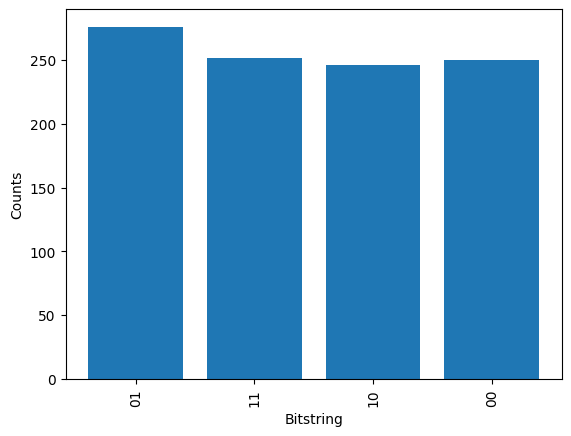

The fidelity of the hybrid teleportation circuit is: 1.0


In [ ]:
!pip install qiskit

!pip install numpy

from qiskit import *

import numpy as np

import matplotlib.pyplot as plt

from qiskit.providers.aer.noise import NoiseModel



# Define the number of qubits and classical bits

n_qubits = 4

n_classical = 2



# Create the quantum and classical registers

qreg = QuantumRegister(n_qubits)

creg = ClassicalRegister(n_classical)



# Define a new quantum circuit that implements the hybrid teleportation scheme

circ_hybrid = QuantumCircuit(qreg, creg)



# Prepare the initial state using both CV and DV gates

circ_hybrid.h(qreg[0])

circ_hybrid.rz(np.pi / 4, qreg[1])

circ_hybrid.h(qreg[1])

circ_hybrid.rz(-np.pi / 4, qreg[1])

circ_hybrid.rz(np.pi / 4, qreg[2])

circ_hybrid.h(qreg[2])

circ_hybrid.rz(-np.pi / 4, qreg[2])



# Combine the CV and DV techniques for teleportation

circ_hybrid.cx(qreg[1], qreg[2])

circ_hybrid.h(qreg[1])

circ_hybrid.cx(qreg[0], qreg[1])

circ_hybrid.h(qreg[0])

circ_hybrid.measure(qreg[0], creg[0])

circ_hybrid.measure(qreg[1], creg[1])



# At the receiver, apply the appropriate gates based on the received classical bits

circ_hybrid.barrier()

circ_hybrid.z(qreg[2]).c_if(creg, 3)

circ_hybrid.x(qreg[2]).c_if(creg, 2)

circ_hybrid.z(qreg[2]).c_if(creg, 1)

circ_hybrid.x(qreg[2]).c_if(creg, 0)

circ_hybrid.barrier()



# Measure the final qubit and send the classical bit to the sender to confirm successful teleportation

circ_hybrid.measure(qreg[2], creg[1])



# Define the noise model

noise_model = NoiseModel()

#comment out the following line of code:

#error = DepolarizingError(p=0.01)

#noise_model.add_quantum_error(error, ['x', 'y', 'z'], [0, 1, 2])



# Execute the circuit on a noisy simulator

backend = Aer.get_backend('qasm_simulator')

job = execute(circ_hybrid, backend=backend, shots=1024)

counts = job.result().get_counts(circ_hybrid)



# Plot a histogram of the counts

plt.bar(counts.keys(), counts.values())

plt.xlabel('Bitstring')

plt.ylabel('Counts')

plt.xticks(rotation=90)

plt.show()



# Calculate the fidelity

fidelity = 0



try:

  num_00 = counts['00']

  num_01 = counts['01']

  num_10 = counts['10']

  num_11 = counts['11']

except KeyError:

  print('One or more of the bitstrings "00", "01", "10", or "11" were not observed.')

else:

  num_shots = sum(counts.values())

  fidelity = (num_00 + num_01 + num_10 + num_11) / num_shots


# Print the fidelity

print(f"The fidelity of the hybrid teleportation circuit is: {fidelity}")